In [1]:
from pyoculus.problems import CylindricalBfield, AnalyticCylindricalBfield
from pyoculus.solvers import PoincarePlot, FixedPoint, Manifold
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
separatrix = {"type": "circular-current-loop", "amplitude": -4.2, "R": 3, "Z": -2.2}
maxwellboltzmann = {"m": 3, "n": -2, "d": 1, "type": "maxwell-boltzmann", "amplitude": 1e-5}
gaussian10 = {"m": 1, "n": 0, "d": 1, "type": "gaussian", "amplitude": 0.1}

ps = AnalyticCylindricalBfield.without_axis(3, 0, 0.91, 0.7, perturbations_args = [separatrix], Rbegin = 1, Rend = 5, niter = 800, guess=[3.,-0.1],  tol = 1e-9)
# ps = AnalyticCylindricalBfield(3, 0, 0.9, 0.7, perturbations_args = [separatrix])

In [88]:
separatrix = {"type": "circular-current-loop", "amplitude": -4, "R": 9, "Z": 0.}

# ps = AnalyticCylindricalBfield.without_axis(3, 0, 0.91, 0.7, perturbations_args = [separatrix], Rbegin = 1, Rend = 5, niter = 800, guess=[3.,-0.1],  tol = 1e-9)
ps = AnalyticCylindricalBfield(3, 0, 0.9, 0.7, perturbations_args = [separatrix])

In [2]:
separatrix = {"type": "circular-current-loop", "amplitude": -1.8, "R": 4.7, "Z": -1.5}

ps = AnalyticCylindricalBfield.without_axis(3, 0, 0.91, 0.7, perturbations_args = [separatrix], Rbegin = 1, Rend = 5, niter = 1800,  guess=[3.3,-0.2],  tol = 1e-9)
# ps = AnalyticCylindricalBfield(3, 0, 0.9, 0.7, perturbations_args = [separatrix])

0 - dr : 0.010534185489793093
1 - RZ : [ 3.32744588 -0.16895694]
1 - dr : 0.00081891422360006
2 - RZ : [ 3.32569038 -0.17126016]
2 - dr : 1.5507401721831344e-07
3 - RZ : [ 3.32568983 -0.17125958]
3 - dr : 4.5155182495639656e-14


#### Equilibrium and creating single null configuration

In [89]:
# set up the integrator
iparams = dict()
iparams["rtol"] = 1e-10

# set up the Poincare plot
pparams = dict()
pparams["Rbegin"] = 3.
pparams["Rend"] = 6
pparams["nPtrj"] = 20
pparams["nPpts"] = 200
pparams["zeta"] = 0
# pparams["Z"] = -6

# Set RZs
nfieldlines = pparams["nPtrj"]+1
Rs = np.linspace(3.326, 4.7, nfieldlines)
Zs = np.linspace(-0.1713, -1.5, nfieldlines)
RZs = np.array([[r, z] for r, z in zip(Rs, Zs)])

pplot = PoincarePlot(ps, pparams, integrator_params=iparams)
pdata = pplot.compute(RZs)
# pdata = pplot.compute()

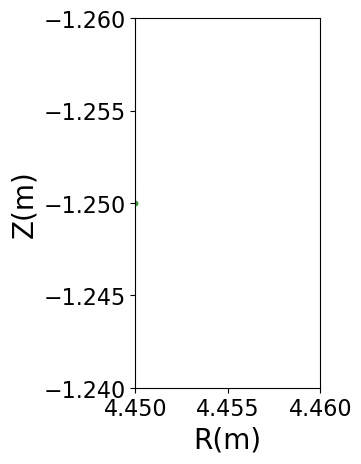

In [90]:
fig, ax = pplot.plot(marker=".", s=1, xlim=[4.45, 4.46], ylim=[-1.24, -1.26])
# fig, ax = pplot.plot(marker=".", s=1)
ax.scatter(ps._R0, ps._Z0, marker="o", edgecolors="black", linewidths=1)
ax.scatter(4.45, -1.25, s=10)
plt.show()

In [ ]:
import pickle
pickle.dump(fig, open("../output/toybox_45degtokamak_poincare.pkl", "wb"))

In [3]:
import pickle
fig = pickle.load(open("../output/toybox_45degtokamak_poincare.pkl", "rb"))

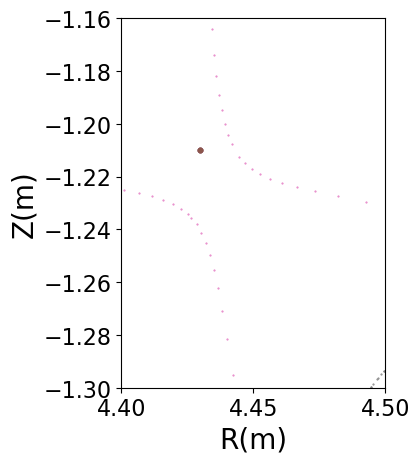

In [7]:
ax = fig.get_axes()[0]
ax.set_xlim(4.4, 4.5)
ax.set_ylim(-1.3, -1.16)
ax.scatter(4.43, -1.21, s=10)
plt.show()
fig

### Finding fixed points

In [ ]:
from pyoculus.solvers import FixedPoint

# set up the integrator
iparams = dict()
iparams["rtol"] = 1e-10

pparams = dict()
pparams["nrestart"] = 0
pparams['niter'] = 300

fp = FixedPoint(ps, pparams, integrator_params=iparams)

# fp.compute(guess=[3.5, 0], pp=1, qq=2, sbegin=2, send=4, tol = 1e-12)
fp.compute(guess=[4.43, -1.22], pp=0, qq=1, sbegin=0.1, send=6, tol = 1e-9)

In [ ]:
hist = np.array(fp.history)
plt.plot(hist[:, 0], hist[:, 1], marker="o", markersize=3)
plt.scatter(ps._R0, ps._Z0, marker="o", edgecolors="black", linewidths=1)

In [ ]:
results = [list(p) for p in zip(fp.x, fp.y, fp.z)]
results

In [ ]:
ax.scatter(results[0][0], results[0][2], marker="X", edgecolors="black", linewidths=1)
fig

In [42]:
# set up the integrator
iparams = dict()
iparams["rtol"] = 1e-10

# set up the Poincare plot
pparams = dict()
pparams["Rbegin"] = 3.01
pparams["Rend"] = 5.5
pparams["nPtrj"] = 20
pparams["nPpts"] = 200
pparams["zeta"] = 0
# pparams["Z"] = -6

# Set RZs
nfieldlines = pparams["nPtrj"]+1
n1, n2 = int(np.ceil(nfieldlines/2)), int(np.floor(nfieldlines/2))

# # Simple way from opoint to xpoint then to coilpoint
# Rs = np.concatenate((np.linspace(ps._R0, results[0][0], n1), np.linspace(results[0][0], separatrix['R']-1e-4, n2)))
# Zs = np.concatenate((np.linspace(ps._Z0, results[0][2], n1), np.linspace(results[0][2], separatrix['Z']-1e-4, n2)))
# RZs = np.array([[r, z] for r, z in zip(Rs, Zs)])

# # Sophisticated way more around the xpoint
xpoint = np.array([results[0][0], results[0][2]])
opoint = np.array([ps._R0, ps._Z0])
coilpoint = np.array([ps.perturbations_args[0]['R'], ps.perturbations_args[0]['Z']])

deps = 0.01
RZ1 = (xpoint + deps*(1-np.linspace(0, 1, n1)).reshape((n1,1)) @ (opoint-xpoint).reshape((1,2)))
RZ2 = (xpoint + deps*np.linspace(0, 1, n2).reshape((n2,1)) @ (coilpoint-xpoint).reshape((1,2)))
RZs = np.concatenate((RZ1, RZ2))

In [43]:
pplot_perturbed = PoincarePlot(ps, pparams, integrator_params=iparams)
pdata = pplot_perturbed.compute(RZs)
# pdata = pplot.compute()

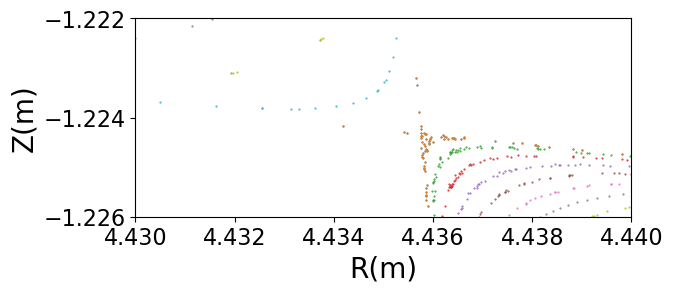

In [74]:
fig_perturbed, ax_perturbed = pplot_perturbed.plot(marker=".", s=1, xlim=[4.43, 4.44], ylim=[-1.226, -1.222])
# ax_perturbed.scatter(3.11, -1.665, marker="X", edgecolors="black", linewidths=1)
# ax_perturbed.scatter(4.4358, -1.2244, marker="X", edgecolors="black", linewidths=1)
plt.show()

In [51]:
pickle.dump(fig_perturbed, open("../output/toybox_45degtokamak_poincare_perturbed.pkl", "wb"))

In [ ]:
for col in ax_perturbed.collections:
    col.set_color('black')
    col.set_sizes([0.5])

In [ ]:
fig_perturbed

In [ ]:
import mayavi.mlab as mlab
import sys
import os

sys.path.append(os.path.join(".."))
import horus as ho

In [ ]:
# convdom[3][0]

In [ ]:
phi = np.linspace(0, 2*np.pi, 100)
gammacoil = np.vstack((ps.perturbations_args[0]['R']*np.cos(phi), ps.perturbations_args[0]['R']*np.sin(phi), ps.perturbations_args[0]['Z']*np.ones_like(phi)))

In [ ]:
gamma1, _ = ho.trace(ps, 2*np.pi, [ps._R0, ps._Z0])
# gamma2, _ = ho.trace(ps, 10*2*np.pi, [fp.x[0], fp.z[0]], rtol=1e-18, atol=1e-20)
gamma2, _ = ho.trace(ps, 2*np.pi, [fp_perturbed.x[0], fp_perturbed.z[0]], rtol=1e-18, atol=1e-20)

# point3 = np.array([fp_perturbed.x[0], fp_perturbed.z[0]]) + 1e-4*manifold.vector_u
# gamma3, _ = ho.trace(ps, 2*np.pi, point3)
# gamma4, _ = ho.trace(ps, 2*np.pi, [3.11210843, -1.66968522],  rtol=1e-18, atol=1e-20)

In [ ]:
print(point3)
print(gamma3[:,0])
print(gamma3[:,-1])

In [ ]:
mlab.plot3d(gamma1[0, :], gamma1[1, :], gamma1[2, :])
mlab.plot3d(gamma2[0, :], gamma2[1, :], gamma2[2, :])
# mlab.plot3d(gamma3[0, :], gamma3[1, :], gamma3[2, :])
# mlab.plot3d(gamma4[0, :], gamma4[1, :], gamma4[2, :])
mlab.plot3d(gammacoil[0, :], gammacoil[1, :], gammacoil[2, :], color=(1, 0, 0))
mlab.show()

In [54]:
# set up the integrator
iparams = dict()
iparams["rtol"] = 1e-16

pparams = dict()
pparams["nrestart"] = 0
pparams['niter'] = 600

fp_perturbed = FixedPoint(ps, pparams, integrator_params=iparams)

# fp_perturbed.compute(guess=[fp.x[0], fp.z[0]], pp=0, qq=1, sbegin=0.1, send=6, tol = 1e-10)
# fp_perturbed.compute(guess=[3.117263523069049, -1.6173346133145015], pp=0, qq=1, sbegin=0.1, send=6, tol = 1e-10)
# fp_perturbed.compute(guess=[3.1072023810385443, -1.655410284892828], pp=0, qq=1, sbegin=0.1, send=6, tol = 4e-12)
# fp_perturbed.compute(guess=[3.117264916246293, -1.617334822348791], pp=0, qq=1, sbegin=0.1, send=6, tol = 1e-10)
# fp_perturbed.compute(guess=[4.624454, 0.], pp=0, qq=1, sbegin=0.1, send=6, tol = 1e-10)
fp_perturbed.compute(guess=[4.43582958 -1.22440153], pp=0, qq=1, sbegin=0.1, send=6, tol = 1e-10)

0 - [DeltaR, DeltaZ] : [2.58320385e-05 2.71206224e-05] - dtheta : 2.4476993139233016e-05
0 - [StepR, StepZ]: [ 2.83487386e-05 -2.79123083e-06]
1 - RZ : [ 4.43582835 -1.22440279] - rhotheta : [ 1.530202   -0.75905757]
1 - [DeltaR, DeltaZ] : [6.31225738e-10 7.66869457e-10] - dtheta : 6.473339642099063e-10
1 - [StepR, StepZ]: [-1.44898918e-05 -1.52134339e-05]
2 - RZ : [ 4.43581386 -1.224418  ] - rhotheta : [ 1.53020196 -0.7590713 ]
2 - [DeltaR, DeltaZ] : [2.44562142e-06 4.10732818e-06] - dtheta : 3.0472859470220826e-06
2 - [StepR, StepZ]: [ 2.81480153e-06 -2.77139700e-07]
3 - RZ : [ 4.43581667 -1.22441828] - rhotheta : [ 1.53020419 -0.75907016]
3 - [DeltaR, DeltaZ] : [-1.41744394e-11  2.85244939e-10] - dtheta : 1.286655226806488e-10
3 - [StepR, StepZ]: [1.01353210e-05 1.70221928e-05]
4 - RZ : [ 4.43582681 -1.22440126] - rhotheta : [ 1.53019983 -0.75905754]
4 - [DeltaR, DeltaZ] : [2.52915863e-06 2.54304635e-06] - dtheta : 2.343226344736493e-06
4 - [StepR, StepZ]: [ 2.76640992e-06 -2.721077

In [ ]:
hist = np.array(fp_perturbed.history)
plt.plot(hist[:, 0], hist[:, 1])

In [55]:
results = [list(p) for p in zip(fp_perturbed.x, fp_perturbed.y, fp_perturbed.z)]

In [ ]:
fp_perturbed.x, fp_perturbed.y, fp_perturbed.z

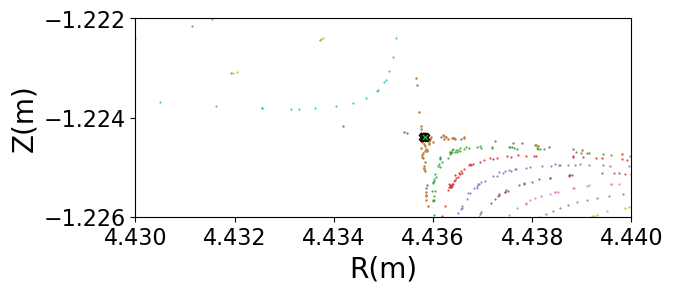

In [56]:
ax_perturbed.scatter(fp_perturbed.x[0], fp_perturbed.z[0], marker="X", edgecolors="black", linewidths=1)
fig_perturbed

In [ ]:
results

In [ ]:
import pickle

In [ ]:
fig_perturbed = pickle.load(open("../output/toybox_poincare_black.pkl", "rb"))
ax_perturbed = fig_perturbed.get_axes()[0]

In [ ]:
rw = np.linspace(3.11, 3.125, 20)
zw = np.linspace(-1.625, -1.61, 20)
ax_perturbed.plot(rw, zw, color="black", linewidth=1)

In [ ]:
fig_perturbed

In [ ]:
# ax_perturbed.set_xlim([3.1, 3.15])
# ax_perturbed.set_ylim([-1.63, -1.6])
ax_perturbed.set_xlim([2.5, 3.9])
ax_perturbed.set_ylim([-2.5, 0.5])
ax_perturbed.scatter(ps._R0, ps._Z0, marker="o", edgecolors="black", linewidths=1)
ax_perturbed.scatter(fp_perturbed.x[0], fp_perturbed.z[0], marker="X", edgecolors="black", linewidths=1)
fig_perturbed

In [ ]:
plt.show()

In [68]:
import sys
sys.path.append("..")
import horus as ho

# [3.117263523069049, -1.6173346133145015]

# rw = np.linspace(3.11, 3.125, 10)
# zw = np.linspace(-1.625, -1.61, 10)
# rw = np.linspace(4.63, 4.64, 30)
# zw = np.linspace(-0.01, 0.01, 30)
rw = np.linspace(4.435, 4.438, 30)
zw = np.linspace(-1.23, -1.22, 30)
convdom = ho.convergence_domain(ps, rw, zw, pp = 0, qq = 1, sbegin = 2, send = 6, tol = 1e-10, checkonly = True, eps = 1e-4, rtol = 1e-10)

0 - [DeltaR, DeltaZ] : [-0.04224101  0.99236184] - dtheta : 0.6999510124796166
0 - [StepR, StepZ]: [ 0.22992141 -0.44694665]
1 - RZ : [ 4.66492141 -1.67694665] - rhotheta : [ 2.01510168 -0.84384129]
1 - [DeltaR, DeltaZ] : [-2.74326111  2.15069239] - dtheta : 3.554793960167088
1 - [StepR, StepZ]: [-2.06387309  0.10760564]
2 - RZ : [ 2.60104832 -1.569341  ] - rhotheta : [ 1.57471807 -2.04898549]
2 - [DeltaR, DeltaZ] : [0.44800697 3.10690167] - dtheta : 3.7802757295376823
2 - [StepR, StepZ]: [0.06546986 1.55027988]
3 - RZ : [ 2.66651818 -0.01906113] - rhotheta : [0.67651433 2.91467582]
3 - [DeltaR, DeltaZ] : [0.51253088 0.48555004] - dtheta : 5.1653125678954215
3 - [StepR, StepZ]: [0.27942324 0.22216081]
4 - RZ : [2.94594142 0.20309968] - rhotheta : [0.53324826 2.36334075]
4 - [DeltaR, DeltaZ] : [0.31269025 0.11566347] - dtheta : 5.626643131287979
4 - [StepR, StepZ]: [ 0.19950079 -0.02904127]
5 - RZ : [3.14544221 0.17405841] - rhotheta : [0.38953012 2.05186958]
5 - [DeltaR, DeltaZ] : [0.1

c:\Users\Ludovic\miniforge3\envs\simsopt\lib\site-packages\scipy\integrate\_ode.py:431: UserWarning: dopri5: step size becomes too small
  self._y, self.t = mth(self.f, self.jac or (lambda: None),


Search failed: starting from a random initial guesss!
Fixed point search unsuccessful for pp/qq= 0 / 1
0 - [DeltaR, DeltaZ] : [-0.02710726  0.89963263] - dtheta : 0.6160026008600507
0 - [StepR, StepZ]: [ 0.15387228 -0.37259728]
1 - RZ : [ 4.58918263 -1.60259728] - rhotheta : [ 1.90922541 -0.84760184]
1 - [DeltaR, DeltaZ] : [-2.4726302   1.74136333] - dtheta : 3.7381992606694894
1 - [StepR, StepZ]: [10.40037682 -1.34439068]
2 - RZ : [14.98955944 -2.94698797] - rhotheta : [11.9896006  -0.23363093]
Search failed: starting from a random initial guesss!
Fixed point search unsuccessful for pp/qq= 0 / 1
0 - [DeltaR, DeltaZ] : [-0.02221269  0.86247664] - dtheta : 0.5833424326571116
0 - [StepR, StepZ]: [ 0.12757857 -0.3368906 ]
1 - RZ : [ 4.56299236 -1.5668906 ] - rhotheta : [ 1.86512828 -0.84545971]
1 - [DeltaR, DeltaZ] : [-2.32838542  1.84392254] - dtheta : 3.5972118972136955
1 - [StepR, StepZ]: [-2.46364209  1.8537267 ]
2 - RZ : [2.09935027 0.2868361 ] - rhotheta : [1.3091067 2.7840963]
2 - 

C:\Users\Ludovic\kDrive\etudes\EPFL\masterthesis\pyoculus\pyoculus\problems\cylindrical_bfield.py:110: RuntimeWarning: divide by zero encountered in scalar divide
  dRdt = dRphiZ[0]/dRphiZ[1]
C:\Users\Ludovic\kDrive\etudes\EPFL\masterthesis\pyoculus\pyoculus\problems\cylindrical_bfield.py:111: RuntimeWarning: divide by zero encountered in scalar divide
  dZdt = dRphiZ[2]/dRphiZ[1]
C:\Users\Ludovic\kDrive\etudes\EPFL\masterthesis\pyoculus\pyoculus\problems\cylindrical_bfield.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  M[0,0] = dBdRphiZ[0,0] / dRphiZ[1]  - dRphiZ[0] / dRphiZ[1]**2 * dBdRphiZ[1,0]
C:\Users\Ludovic\kDrive\etudes\EPFL\masterthesis\pyoculus\pyoculus\problems\cylindrical_bfield.py:114: RuntimeWarning: divide by zero encountered in scalar divide
  M[0,1] = dBdRphiZ[0,2] / dRphiZ[1]  - dRphiZ[0] / dRphiZ[1]**2 * dBdRphiZ[1,2]
C:\Users\Ludovic\kDrive\etudes\EPFL\masterthesis\pyoculus\pyoculus\problems\cylindrical_bfield.py:115: RuntimeWarning: divide by

Search failed: starting from a random initial guesss!
Fixed point search unsuccessful for pp/qq= 0 / 1
0 - [DeltaR, DeltaZ] : [0.01120173 0.00406131] - dtheta : 0.006925803930087349
0 - [StepR, StepZ]: [0.00134508 0.00437266]
1 - RZ : [ 4.43831059 -1.22562734] - rhotheta : [ 1.53284583 -0.75852263]
1 - [DeltaR, DeltaZ] : [ 0.12311113 -0.01997377] - dtheta : 0.042874865649712435
1 - [StepR, StepZ]: [0.03132606 0.00343808]
2 - RZ : [ 4.46963665 -1.22218926] - rhotheta : [ 1.55340514 -0.74304429]
2 - [DeltaR, DeltaZ] : [-2.08952747  1.72027223] - dtheta : 3.268652569289297
2 - [StepR, StepZ]: [-2.86726416  0.48384529]
3 - RZ : [ 1.6023725  -0.73834397] - rhotheta : [ 1.81422362 -2.82368799]
Search failed: starting from a random initial guesss!
Fixed point search unsuccessful for pp/qq= 0 / 1
0 - [DeltaR, DeltaZ] : [0.00955657 0.00413044] - dtheta : 0.006226116092191147
0 - [StepR, StepZ]: [0.00149385 0.00405806]
1 - RZ : [ 4.43856282 -1.22594194] - rhotheta : [ 1.53324531 -0.75855841]
1 -

In [70]:
from matplotlib import cm

def plot_convergence_domain(R, Z, assigned_to, fixed_points, ax=None, colors=None):
    """Plot the convergence domain for FixedPoint solver in the R-Z plane. If ax is None, a new figure is created,
    otherwise the plot is added to the existing figure.

    Args:
        R (np.ndarray): the R values of the meshgrid
        Z (np.ndarray): the Z values of the meshgrid
        assigned_to (np.ndarray): the assigned number for each point in the meshgrid
        fixed_points (list): the list of fixed points object (BaseSolver.OutputData)\n
        -- Optional --
        ax (matplotlib.axes.Axes): the axes to plot on. Defaults to None.
        colors (np.ndarray): the colors to use. Defaults to COLORS. Should be of dimension (k, 3 or 4) for RGB/RGBA with k at least the number of fixed point plus one.

    Returns:
        tuple: (fig, ax)
    """

    assigned_to = assigned_to + 1

    if colors is None:
        colors = cm.rainbow(np.linspace(0, 1, len(fixed_points) + 1))
        colors[:, 3] = 0.8
        colors = np.vstack(([0.3, 0.3, 0.3, 0.15], colors))

    cmap = np.array([colors[j] for j in assigned_to])
    cmap = cmap.reshape(R.shape[0], R.shape[1], cmap.shape[1])

    if ax is None:
        fig, ax = plt.subplots()
    else:
        fig = ax.get_figure()

    ax.pcolormesh(R, Z, cmap, shading="nearest")

    # for r,z in zip(R, Z):
    #     ax.scatter(r, z, color = 'blue', s = 1)

    for i, fpt in enumerate(fixed_points):
        if hasattr(fpt, "GreenesResidue"):
            if fpt.GreenesResidue < 0:
                marker = "X"
            elif fpt.GreenesResidue > 0:
                marker = "o"
            else:
                marker = "s"
        else:
            marker = "s"

        ax.scatter(
            fpt.x[0],
            fpt.z[0],
            color=colors[i + 1, :3],
            marker=marker,
            edgecolors="black",
            linewidths=1,
            label=f"[{fpt.x[0]:.2f},{ fpt.z[0]:.2f}]",
        )


    # # Plot arrows from the meshgrid points to the fixed points they converge to
    # for r, z, a in zip(R.flat, Z.flat, assigned_to.flat):
    #     if a > 0:
    #         fpt = fixed_points[a - 1]
    #         dr = np.array([fpt.x[0] - r, fpt.z[0] - z])
    #         dr = 0.1*dr
    #         ax.arrow(r, z, dr[0], dr[1], color='blue')

    ax.set_aspect("equal")

    return fig, ax


In [ ]:
fig_perturbed = fig
ax_perturbed = fig_perturbed.get_axes()[0]

In [ ]:
import pickle

In [65]:
fig_perturbed = pickle.load(open("../output/toybox_45degtokamak_poincare_perturbed.pkl", "rb"))
ax_perturbed = fig_perturbed.get_axes()[0]

# ax_perturbed.set_xlim([3.1, 3.15])
# ax_perturbed.set_ylim([-1.63, -1.6])

In [75]:
convdomplot = convdom[0:4]
plot_convergence_domain(*convdomplot, ax_perturbed)
# ax_perturbed.set_xlim([4.6, 4.7])
# ax_perturbed.set_ylim([-0.05, 0.05])
# ax_perturbed.legend(loc="lower right")

# ax_perturbed.scatter(rw[0], zw[0], marker=".", color = "black", s = 1)
# ax_perturbed.scatter(rw[-1], zw[0], marker=".", color = "black", s = 1)
# ax_perturbed.scatter(rw[0], zw[-1], marker=".", color = "black", s = 1)
# ax_perturbed.scatter(rw[-1], zw[-1], marker=".", color = "black", s = 1)

fig_perturbed
plt.show()

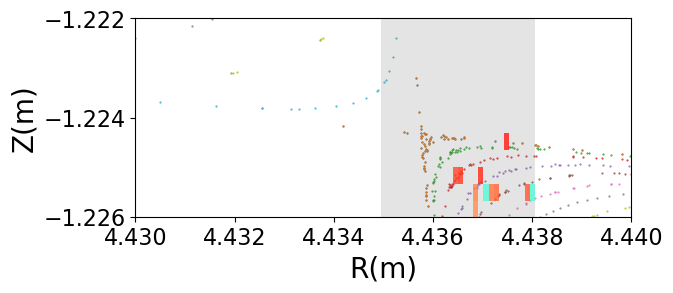

In [76]:
# ax_perturbed.set_xlim([3, 4.5])
# ax_perturbed.set_ylim([-2, 1])
fig_perturbed

In [ ]:
ax_perturbed.set_xlim([4.45, 4.5])
ax_perturbed.set_ylim([-1.3, -1.2])
fig_perturbed

In [ ]:
pickle.dump(fig_perturbed, open("../output/toybox_tokamak_conv0z1e-10_morepoints.pkl", "wb"))

In [78]:
fig_history = pickle.loads(pickle.dumps(fig_perturbed))
ax_history = fig_history.gca()

In [ ]:
i = 30
print(convdom[0].flatten()[i], convdom[1].flatten()[i])
hist = np.array(convdom[4][i].history)
ax_history.plot(hist[:,0], hist[:,1], color='black', linewidth=1, marker='o', markersize=3)

In [79]:
for i, hist in enumerate(convdom[4]):
    if i % 11 == 0:
        continue
    if hist is not None:    
        hist = np.array(hist.history)
        ax_history.plot(hist[:,0], hist[:,1], color='black', linewidth=0.3, marker='o', markersize=1, alpha=0.2)

In [ ]:

convdom[4][35].history

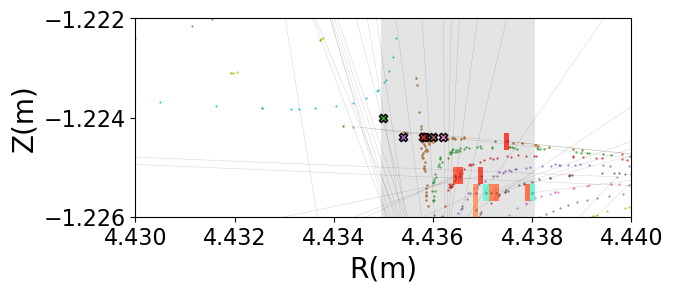

In [86]:
# ax_history.set_ylim([-0.006, 0.006])
# ax_history.set_xlim([4.63, 4.64])
ax_history.scatter(4.4362, -1.2244, marker="X", edgecolors="black", linewidths=1)
fig_history

In [ ]:
pickle.dump(fig_history, open("../output/toybox_conv_hist0z1e-10_morepoints.pkl", "wb"))

In [ ]:
ps.B([4, 0, 0.])

In [ ]:
for fixed_point in convdom[3]:
    fixed_point.x


In [ ]:
[[f.x[0],f.z[0]] for f in convdom[3]]

### Back on manifold

In [ ]:
from pyoculus.integrators import RKIntegrator

iparams = dict()
iparams["rtol"] = 1e-10
iparams["ode"] = ps.f_RZ_tangent

integrator = RKIntegrator(iparams)

In [ ]:
ps.B([3.117263523069049, 0., -1.6173346133145015])

In [ ]:
ps.dBdX([3.117263523069049, 0., -1.6173346133145015])

In [ ]:
initpoint = np.array([3.117263523069049, -1.6173346133145015])
v = 1e-5*np.random.random(2)

In [ ]:
ic = np.array([initpoint[0], initpoint[1], 1.0, 0.0, 0.0, 1.0], dtype=np.float64)
integrator.set_initial_value(0, ic)
M = integrator.integrate(2*np.pi)
endpoint1 = M[0:2]
M = np.array([[M[2], M[4]],[M[3], M[5]]])
print(M)

In [ ]:
np.linalg.inv(M)

In [ ]:
np.linalg.inv(M-np.eye(2))

In [ ]:
det = np.linalg.det(M-np.eye(2))
print(det)

In [ ]:
np.linalg.eig(M)

In [ ]:
np.linalg.inv(M)/det

In [ ]:
np.linalg.det(M)

In [ ]:
inputpoint = initpoint + v
ic = np.array([inputpoint[0], inputpoint[1], 1.0, 0.0, 0.0, 1.0], dtype=np.float64)
integrator.set_initial_value(0, ic)
endpoint2 = integrator.integrate(2*np.pi)[0:2]

In [ ]:
M @ v

In [ ]:
endpoint2 - endpoint1

In [ ]:
((M @ v) - (endpoint2 - endpoint1))/np.linalg.norm(endpoint2 - endpoint1)

In [ ]:
from pyoculus.solvers import BaseSolver
from pyoculus.solvers import FixedPoint
from pyoculus.problems import BfieldProblem, CartesianBfield
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve, newton_krylov
import numpy as np
from numba import jit

class Manifold(BaseSolver):
    def __init__(self, fixedpoint, bfield, params=dict(), integrator=None, integrator_params=dict()):
        
        # Check that the fixed point is a correct FixedPoint instance
        assert isinstance(fixedpoint, FixedPoint), "Fixed point must be an instance of FixedPoint class"
        assert fixedpoint.successful, "Need a successful fixed point to compute the manifold"

        self.fixedpoint = fixedpoint

        # Compute the eigenvalues and eigenvectors of the fixed point
        eigRes = np.linalg.eig(fixedpoint.jacobian)
        eigenvalues = eigRes[0]
        # Eigenvectors are stored as columns of the matrix eigRes[1], transposing it to access them as np.array[i]
        eigenvectors = eigRes[1].T
        s_index, u_index = 0, 1
        if eigenvalues[0].real > eigenvalues[1].real:
            s_index, u_index = 1, 0

        self.vector_u = eigenvectors[u_index]
        self.lambda_u = eigenvalues[u_index]
        self.vector_s = eigenvectors[s_index]
        self.lambda_s = eigenvalues[s_index]

        # Check that the bfield is a correct BfieldProblem instance
        assert isinstance(bfield, BfieldProblem), "Bfield must be an instance of BfieldProblem class"
        self.bfield = bfield

        # Integrator and BaseSolver initialization
        integrator_params["ode"] = bfield.f_tangent

        # Setting the needed parameters
        if "solve_ivp" not in params:
            params["solve_ivp"] = True

        self._start_config_params = {
            "phi": 0,
            "integrate_ivp_kwargs": {
                "atol": 1e-22, "rtol": 3e-14, "nintersect": 1, "method": "DOP853"
            },
        }
        self._start_config_params.update({key: value for key, value in params.items() if key in self._start_config_params})

        params = {key: value for key, value in params.items() if key not in self._start_config_params}

        self.unstable = {'+': None, '-': None}
        self.stable = {'+': None, '-': None}

        super().__init__(
            problem=bfield,
            params=params,
            integrator=integrator,
            integrator_params=integrator_params,
        )

    def compute(self, **kwargs):
        if self._params["solve_ivp"] == True:
            return self.compute_ivp(**kwargs)
        else:
            pass

    def compute_ivp(self, **kwargs):
        options = {
            "eps_guess": 2e-6,
            "nintersect": 10,
            "atol": 1e-20,
            "rtol": 1e-10,
            "neps": 2,
            "directions": "u+u-s+s-"
        }
        options.update({key: value for key, value in kwargs.items() if key in options})
        
        rz_fixedpoint = np.array([self.fixedpoint.x[0], self.fixedpoint.z[0]])

        # epsilon = options['eps_guess']
        epsilon = self.find_epsilon(options['eps_guess'], self.vector_u)
        
        RZs = self.start_config(epsilon, self.vector_u, options['neps'])[0]

        if 'u+' in options['directions']:
            print("Computing unstable manifold with postive epsilon...")
            self.unstable['+'] = self.integrate_ivp(RZs, [0], nintersect=options['nintersect'], atol = options['atol'], rtol = options['rtol'])

        if 'u-' in options['directions']:
            print("Computing unstable manifold with negative epsilon...")
            RZs  = 2*rz_fixedpoint - RZs
            self.unstable['-'] = self.integrate_ivp(RZs, [0], nintersect=options['nintersect'], atol = options['atol'], rtol = options['rtol'])
        
        RZs = self.start_config(epsilon, self.vector_s, options['neps'], -1)[0]
        if 's+' in options['directions']:
            print("Computing stable manifold with positive epsilon...")
            self.stable['+'] = self.integrate_ivp(RZs, [0], nintersect=options['nintersect'], atol = options['atol'], rtol = options['rtol'], direction=-1)
        
        if 's-' in options['directions']:
            print("Computing stable manifold with negative epsilon...")
            RZs = 2*rz_fixedpoint - RZs
            self.stable['-'] = self.integrate_ivp(RZs, [0], nintersect=options['nintersect'], atol = options['atol'], rtol = options['rtol'], direction=-1)


    def start_config(self, epsilon, eigenvector, neps=10, direction=1):
        options = self._start_config_params
        options['integrate_ivp_kwargs']['direction'] = direction

        rEps = np.array([self.fixedpoint.x[0], self.fixedpoint.z[0]]) + epsilon * eigenvector

        out = self.integrate_ivp(np.atleast_2d(rEps), [options['phi']], **options['integrate_ivp_kwargs'])
        
        eps_dir = out.y[:,1]-out.y[:,0]
        eps_dir = eps_dir / np.linalg.norm(eps_dir)
        
        print(epsilon, eps_dir, eigenvector, np.linalg.norm(eps_dir - eigenvector))

        Rs = np.linspace(out.y[0,0], out.y[0,1], neps, endpoint=False)
        Zs = np.linspace(out.y[1,0], out.y[1,1], neps, endpoint=False)
        RZs = np.array([[r, z] for r, z in zip(Rs, Zs)])

        return RZs, np.linalg.norm(eps_dir - eigenvector)
    

    def find_epsilon(self, eps_guess, eigenvector, iter = 4):
        find_eps = lambda x: self.start_config(x, eigenvector, 1)[1]

        # eps_root = fsolve(find_eps, eps_guess, xtol=options['xtol'])
        try:
            eps_root = newton_krylov(find_eps, eps_guess, inner_maxiter=iter)[0]
            print(f"Newton-Krylov succeeded, epsilon = {eps_root}")
        except:
            print("Newton-Krylov failed, using the guess for epsilon.")
            return eps_guess

        return eps_root

    def integrate_ivp(self, RZstart, phis, **kwargs):
        options = {
            "rtol": 1e-7,
            "atol": 1e-8,
            "nintersect": 10,
            "method": "DOP853",
            "direction": 1,
        }
        options.update(kwargs)

        assert RZstart.shape[1] == 2, "RZstart must be a 2D array with shape (n, 2)"
        assert len(phis) > 0, "phis must be a list of floats with at least one element"
        assert isinstance(options["nintersect"], int) and options["nintersect"] > 0, "nintersect must be a positive integer"
        assert options["direction"] in [-1, 1], "direction must be either -1 or 1"

        def Bfield_2D(t, rzs):
            rzs = rzs.reshape((-1, 2))
            phis = options['direction']*(t % (2 * np.pi)) * np.ones(rzs.shape[0])
            Bs = self.bfield.B_many(rzs[:, 0], phis, rzs[:, 1])

            # Check if the field goes back in phi and set it to NaN
            is_perturbed = (Bs[:,1] < 1e-24) + (rzs[:, 0] < 1e-22)
            Bs[is_perturbed, :] = np.array([0, 1, 0])

            Bs = np.vstack((Bs[:, 0]/Bs[:, 1], Bs[:, 0]/Bs[:, 1]))
            return options['direction']*Bs.flatten() 

        # def Bfield_2D(t, rzs):
        #     rzs = rzs.reshape((-1, 2))
        #     phis = options['direction']*(t % (2 * np.pi)) * np.ones(rzs.shape[0])
        #     bs_Bs = self.bfield.B_many(rzs[:, 0]*np.cos(phis), rzs[:, 0]*np.sin(phis), rzs[:, 1])

        #     # Transform the B field to cylindrical coordinates
        #     rphizs = np.array([rzs[:, 0], phis, rzs[:, 1]]).T
        #     Bs = np.empty_like(bs_Bs)
        #     for i, (position, B) in enumerate(zip(rphizs, bs_Bs)):
        #         Bs[i, :] = (CartesianBfield._inv_Jacobian(*position) @ B.reshape(3, -1)).reshape(-1)

        #     # Check if the field goes back in phi and set it to NaN
        #     is_perturbed = (Bs[:,1] < 1e-24) + (rzs[:, 0] < 1e-22)
            
        #     # if t == 0 or np.random.rand() < 0.0001:
        #     #     print(rzs)
        #     #     print(Bs)
        #     #     print(np.sign(Bs[:, 1]))
        #     #     print(t, is_perturbed.sum())
        #     Bs[is_perturbed, :] = np.array([0, 1, 0])

        #     Bs = np.vstack((Bs[:, 0]/Bs[:, 1], Bs[:, 0]/Bs[:, 1]))
        #     return options['direction']*Bs.flatten()
        
        # setup the phis of the poincare sections
        phis = np.unique(np.mod(phis, 2 * np.pi / self.bfield.Nfp))
        phis.sort()

        # setup the evaluation points for those sections
        phi_evals = np.array(
            [
                phis + self.fixedpoint.qq * 2 * np.pi * i / self.bfield.Nfp
                for i in range(options["nintersect"] + 1)
            ]
        )

        out = solve_ivp(
            Bfield_2D,
            [0, phi_evals[-1, -1]],
            RZstart.flatten(),
            t_eval=phi_evals.flatten(),
            method=options["method"],
            atol=options["atol"],
            rtol=options["rtol"],
        )

        return out

In [ ]:
manifold = Manifold(fp_perturbed, ps)

In [ ]:
manifold.vector_u, manifold.lambda_u, manifold.vector_s, manifold.lambda_s

In [ ]:
def conv_epslion(manifold, epsw):
    find_eps = lambda x: manifold.start_config(x, manifold.vector_s, 1, -1)[1]
    diff = np.abs([find_eps(ep) for ep in epsw])

    plt.plot(epsw, diff)
    plt.xscale("log")

    return diff


In [ ]:
diff = conv_epslion(manifold, np.logspace(-30,-2,100))

In [ ]:
manifold.compute(nintersect = 40, neps = 15, atol=1e-15, rtol=1e-13, eps_guess=1e-6)

In [ ]:
color = ['red', 'blue', 'green', 'purple']
marker = ['o', 'x', '+', 's']


for i, out in enumerate([
                        manifold.unstable['+'], 
                        manifold.unstable['-'], 
                        manifold.stable['+'],
                        manifold.stable['-']
                        ]):
    if out is not None:
        for yy in out.y.T:
            yy = yy.reshape(-1, 2)
            ax_perturbed.plot(yy[:, 0], yy[:, 1], marker=marker[0], markersize=4, c=color[i], alpha=0.5)

In [ ]:
fig_perturbed